
<center>
<font color="cyan"><h2 > TimeTravel(Human in Loop)(Debugging)</h2></font>
<center>
<p>Langgraph supports debugging by vewing , re-playing and even forking from past states </p>
</center>
</center>



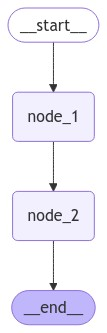

In [87]:
from langchain_core.messages import HumanMessage
from IPython.display import display, Image
from langgraph.graph import START,END,StateGraph,MessagesState
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

class SimpleState(MessagesState):
    pass

def node_1(state):
    return {"messages" : state['messages']}

def node_2(state):
    return state

builder = StateGraph(SimpleState)
builder.add_node('node_1',node_1)
builder.add_node('node_2',node_2)
builder.add_edge(START,'node_1')
builder.add_edge('node_1','node_2')
builder.add_edge('node_2',END)

graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))




In [123]:
config = {'configurable':{'thread_id':5}}
print(graph.invoke({'messages':[HumanMessage(content="Hey!! My name is Aditya")]}, config))

{'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}


#### Currrent State

In [124]:
state = graph.get_state(config)
print(state)

StateSnapshot(values={'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=(), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a902-6956-8002-e411d9e7a905'}}, metadata={'source': 'loop', 'writes': {'node_2': {'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}}, 'step': 2, 'parents': {}}, created_at='2024-11-15T14:17:05.505471+00:00', parent_config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a8ff-6940-8001-35e39e4bf98f'}}, tasks=())


#### Full Satate

In [125]:
full_state = [s for s in graph.get_state_history(config)]
for f in full_state:
    print(f,end="\n\n\n")

StateSnapshot(values={'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=(), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a902-6956-8002-e411d9e7a905'}}, metadata={'source': 'loop', 'writes': {'node_2': {'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}}, 'step': 2, 'parents': {}}, created_at='2024-11-15T14:17:05.505471+00:00', parent_config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a8ff-6940-8001-35e39e4bf98f'}}, tasks=())


StateSnapshot(values={'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=('node_2',), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a

In [126]:
len(full_state)

4

## Updating the snapshot and message(updating the esixting message)
#### Updating state at node 1.So when graph will invoke again it will execute instead of replay.

In [127]:

print(full_state[-3])
to_fork = full_state[-3]

StateSnapshot(values={'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=('node_2',), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a8ff-6940-8001-35e39e4bf98f'}}, metadata={'source': 'loop', 'writes': {'node_1': {'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}}, 'step': 1, 'parents': {}}, created_at='2024-11-15T14:17:05.504270+00:00', parent_config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a8fd-61c2-8000-3f717ac8eeb3'}}, tasks=(PregelTask(id='a8879837-61fe-94a4-3baf-b3cfa03832ab', name='node_2', path=('__pregel_pull', 'node_2'), error=None, interrupts=(), state=None, result={'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759

### Modifying latest snapshot

In [128]:
graph.update_state(to_fork.config,{'messages':[
    HumanMessage(content='Hey My name is Aditya Anand', id = to_fork.values['messages'][0].id)
    ]})

{'configurable': {'thread_id': 5,
  'checkpoint_ns': '',
  'checkpoint_id': '1efa35c4-b617-6f1a-8002-495ca5c40d34'}}

In [129]:
updated_full_state = [s for s in graph.get_state_history(config)]
for f in updated_full_state:
    print(f,end="\n\n\n")

StateSnapshot(values={'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=('node_2',), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-b617-6f1a-8002-495ca5c40d34'}}, metadata={'source': 'update', 'step': 2, 'writes': {'node_1': {'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}}, 'parents': {}}, created_at='2024-11-15T14:17:06.877399+00:00', parent_config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a8ff-6940-8001-35e39e4bf98f'}}, tasks=(PregelTask(id='48eeab77-324a-a38f-f347-5446cd38d29b', name='node_2', path=('__pregel_pull', 'node_2'), error=None, interrupts=(), state=None, result=None),))


StateSnapshot(values={'messages': [HumanMessage(content='Hey!! My name is Aditya', additional_kwargs={}, re

#### This is the new checkpoint that has been created.

In [130]:
print(graph.get_state(config))

StateSnapshot(values={'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=('node_2',), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-b617-6f1a-8002-495ca5c40d34'}}, metadata={'source': 'update', 'step': 2, 'writes': {'node_1': {'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}}, 'parents': {}}, created_at='2024-11-15T14:17:06.877399+00:00', parent_config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-a8ff-6940-8001-35e39e4bf98f'}}, tasks=(PregelTask(id='48eeab77-324a-a38f-f347-5446cd38d29b', name='node_2', path=('__pregel_pull', 'node_2'), error=None, interrupts=(), state=None, result=None),))


In [131]:
print(len(full_state))

4


In [132]:
print(len(updated_full_state))


5


## Now when graph is being executed it will not replay.It will reexecute.
<p>In this way we can go back into time and update the snapshot and do forking </p>

In [133]:
graph.invoke(None,config)

{'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}

In [134]:
updated_full_state_again = [s for s in graph.get_state_history(config)]
for f in updated_full_state_again:
    print(f,end="\n\n\n")

StateSnapshot(values={'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=(), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c5-afee-67b4-8003-e1e39acd02e9'}}, metadata={'source': 'loop', 'writes': {'node_2': {'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}}, 'step': 3, 'parents': {}}, created_at='2024-11-15T14:17:33.074821+00:00', parent_config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id': '1efa35c4-b617-6f1a-8002-495ca5c40d34'}}, tasks=())


StateSnapshot(values={'messages': [HumanMessage(content='Hey My name is Aditya Anand', additional_kwargs={}, response_metadata={}, id='41318678-5a91-4759-9b21-3acb50b29b69')]}, next=('node_2',), config={'configurable': {'thread_id': 5, 'checkpoint_ns': '', 'checkpoint_id':

In [135]:
len(updated_full_state_again)

6